## 1. Data Loading and Initial Check

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("diabetes.csv") # loading data

In [3]:
data.groupby('Outcome').mean() #have some difference between yes/no diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [4]:
data.groupby('Outcome').median() #group outcome via diabets, insulin quite strange

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,21.0,39.0,30.05,0.336,27.0
1,4.0,140.0,74.0,27.0,0.0,34.25,0.449,36.0


In [5]:
data.describe() #found some uncommon values accoridng features, Glucose, bBP, thickness, insulin, BMI strange minimum zero

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum() #check naa

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
feature_zero_counts = (data[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']] == 0).sum()
print("Number of zeros in critical features:")
print(feature_zero_counts) # around 400 observation insulin 0, quite strange. replace Nan might not good. 

Number of zeros in critical features:
Glucose            5
BloodPressure     35
SkinThickness    227
BMI               11
Insulin          374
dtype: int64


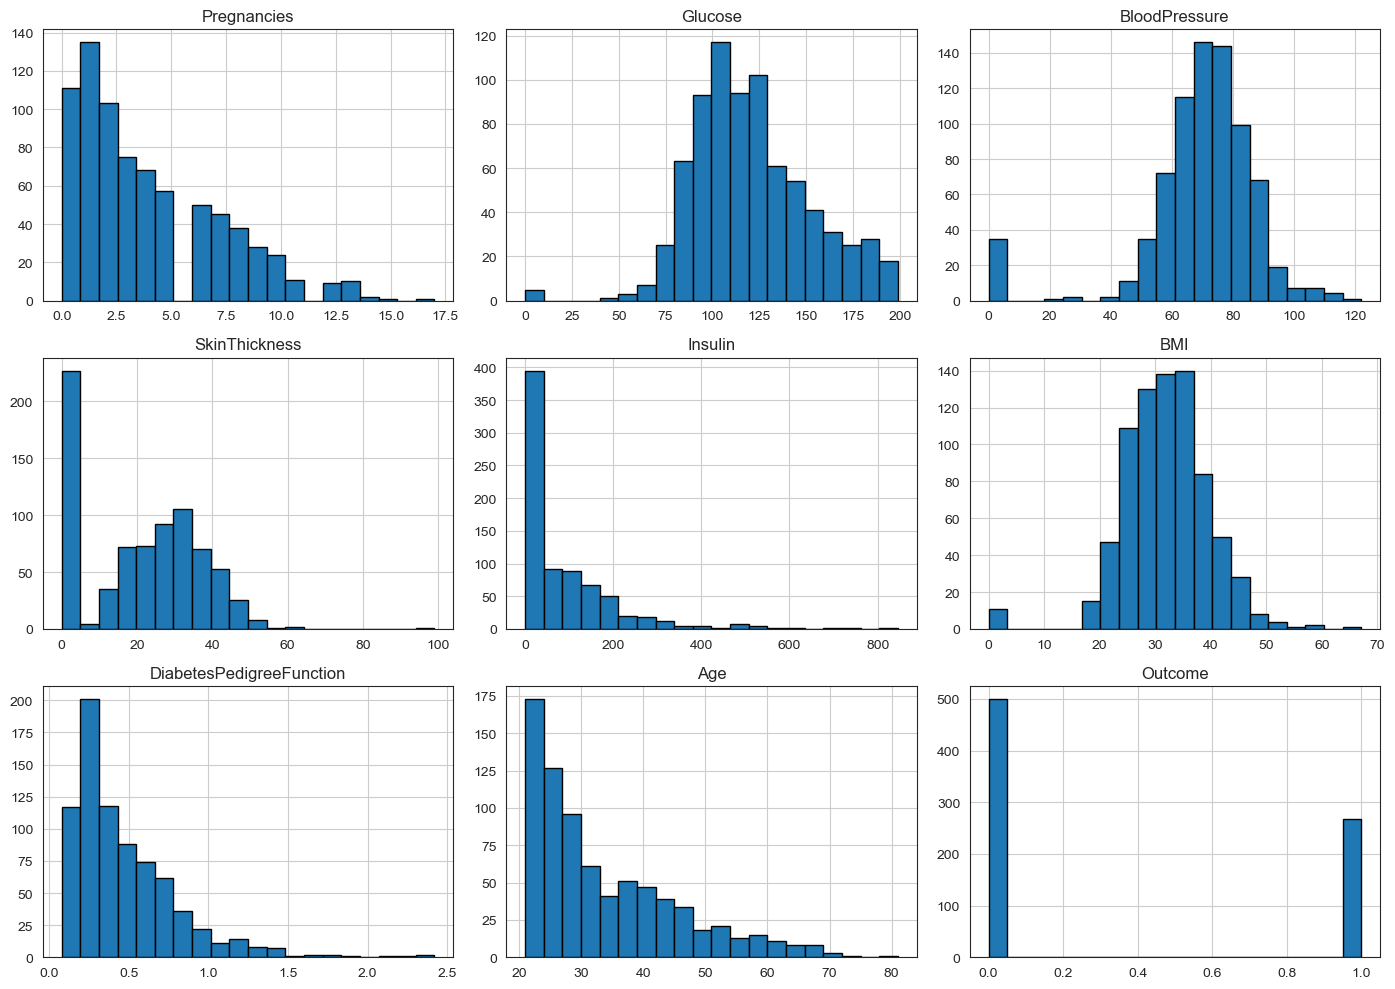

In [8]:
sns.set_style("white")
data.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.tight_layout()
plt.show() #further check distribution to find uncommon value apprear in each features. Glucose, BP, thickness, insulin, BMI clean zero values. 

## 2. Data Cleaning and EDA

In [9]:
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # from part 1. decided clean uncommon values for selected features

In [10]:
data_clean = data.copy()

In [11]:
for column in columns_to_clean:

    mean_by_outcome = data_clean.groupby('Outcome')[column].mean()

    data_clean.loc[(data[column] == 0) & (data['Outcome'] == 0), column] = mean_by_outcome[0]
    data_clean.loc[(data[column] == 0) & (data['Outcome'] == 1), column] = mean_by_outcome[1] # method refer to research work on pima indian diabets

In [12]:
data_clean.describe() # seem better now

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.691999,72.267826,26.635083,118.967780,32.439222,0.471876,33.240885,0.348958
std,3.369578,30.461151,12.115948,9.636089,93.557899,6.880449,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,19.664000,68.792000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
data_clean.groupby('Outcome').mean() #difference remian by groups after clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.639880,70.774992,25.130592,101.261824,30.849676,0.429734,31.190000
1,4.865672,142.311623,75.052963,29.441969,152.001281,35.404795,0.550500,37.067164


In [14]:
data_clean.groupby('Outcome').median() #check cleaned main summary data. Insulin seems more common than mean value. this less resistant here

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.5,70.0,21.0,68.792000,30.3042,0.336,27.0
1,4.0,140.5,74.0,27.0,100.335821,34.3000,0.449,36.0


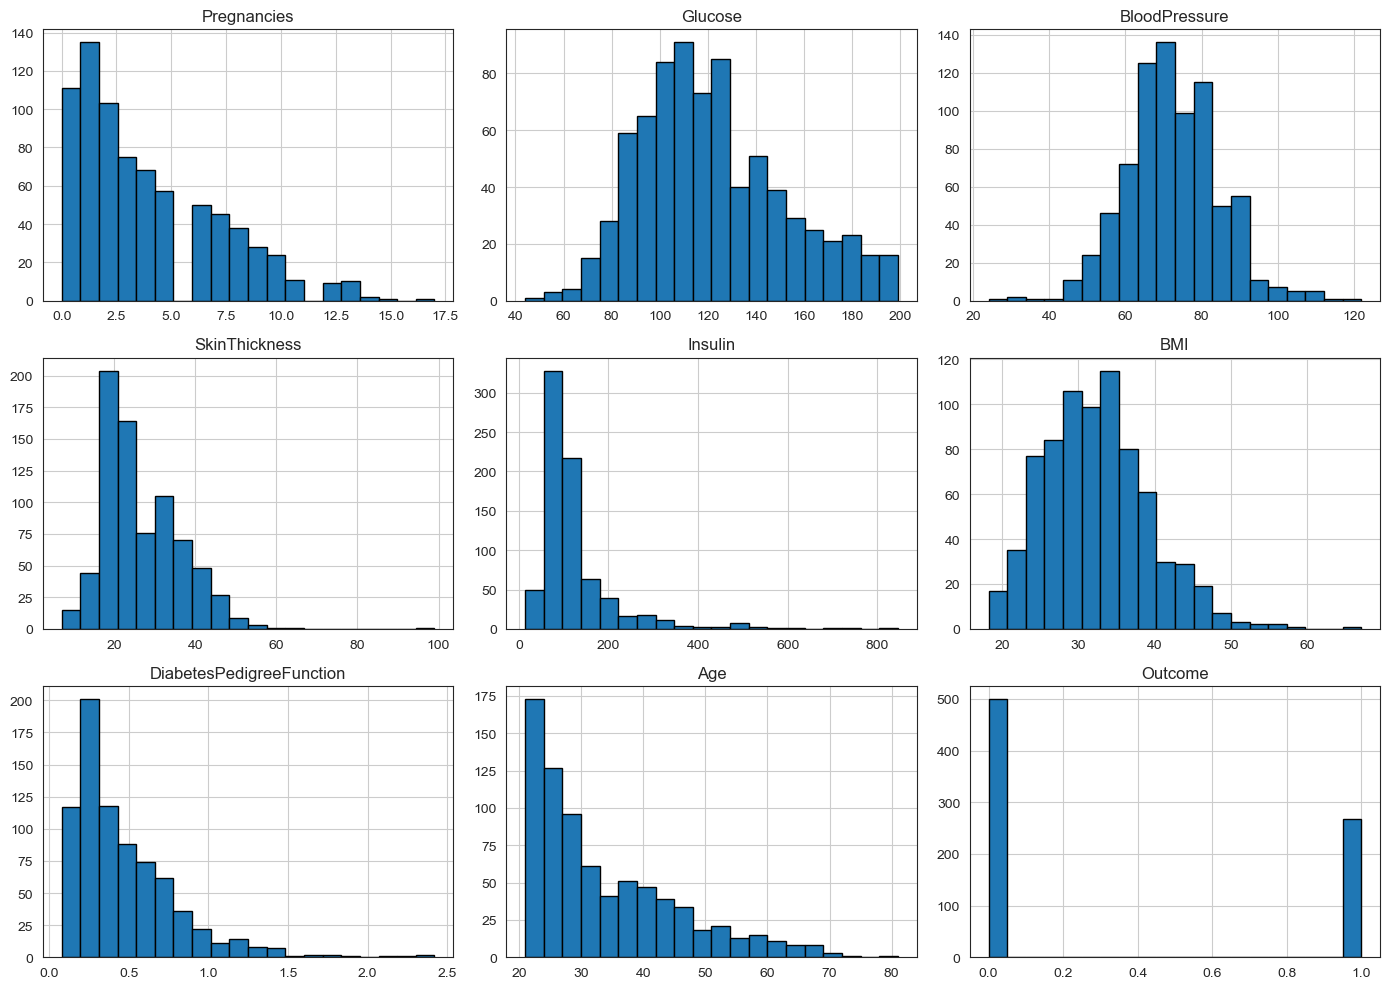

In [15]:
sns.set_style("white")
data_clean.hist(bins=20, figsize=(14, 10), edgecolor='black')

plt.tight_layout()
plt.show() # check cleaned data distribution. more accpetable than the orginal one. but consider apply scalue as value range difference too big. Glucose, BP, BMI distriution seems good

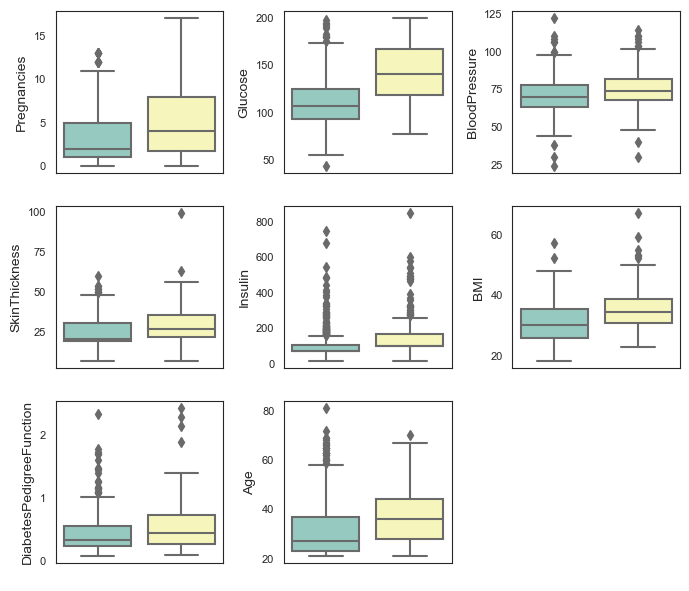

In [16]:
plt.figure(figsize=(7, 6))

for i, column in enumerate(data_clean.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=data_clean, palette="Set3")
    plt.xlabel(' ')
    plt.xticks([])
    plt.ylabel(column, fontsize=10)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show() # plt boxplot by group to see any significant different with mean/speard for each features
# seems Pregancy, glucose, BMI, Insulin Age more significant to see a difference, can confirm with further feature improtant by model if work

c:\Users\liaomx\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


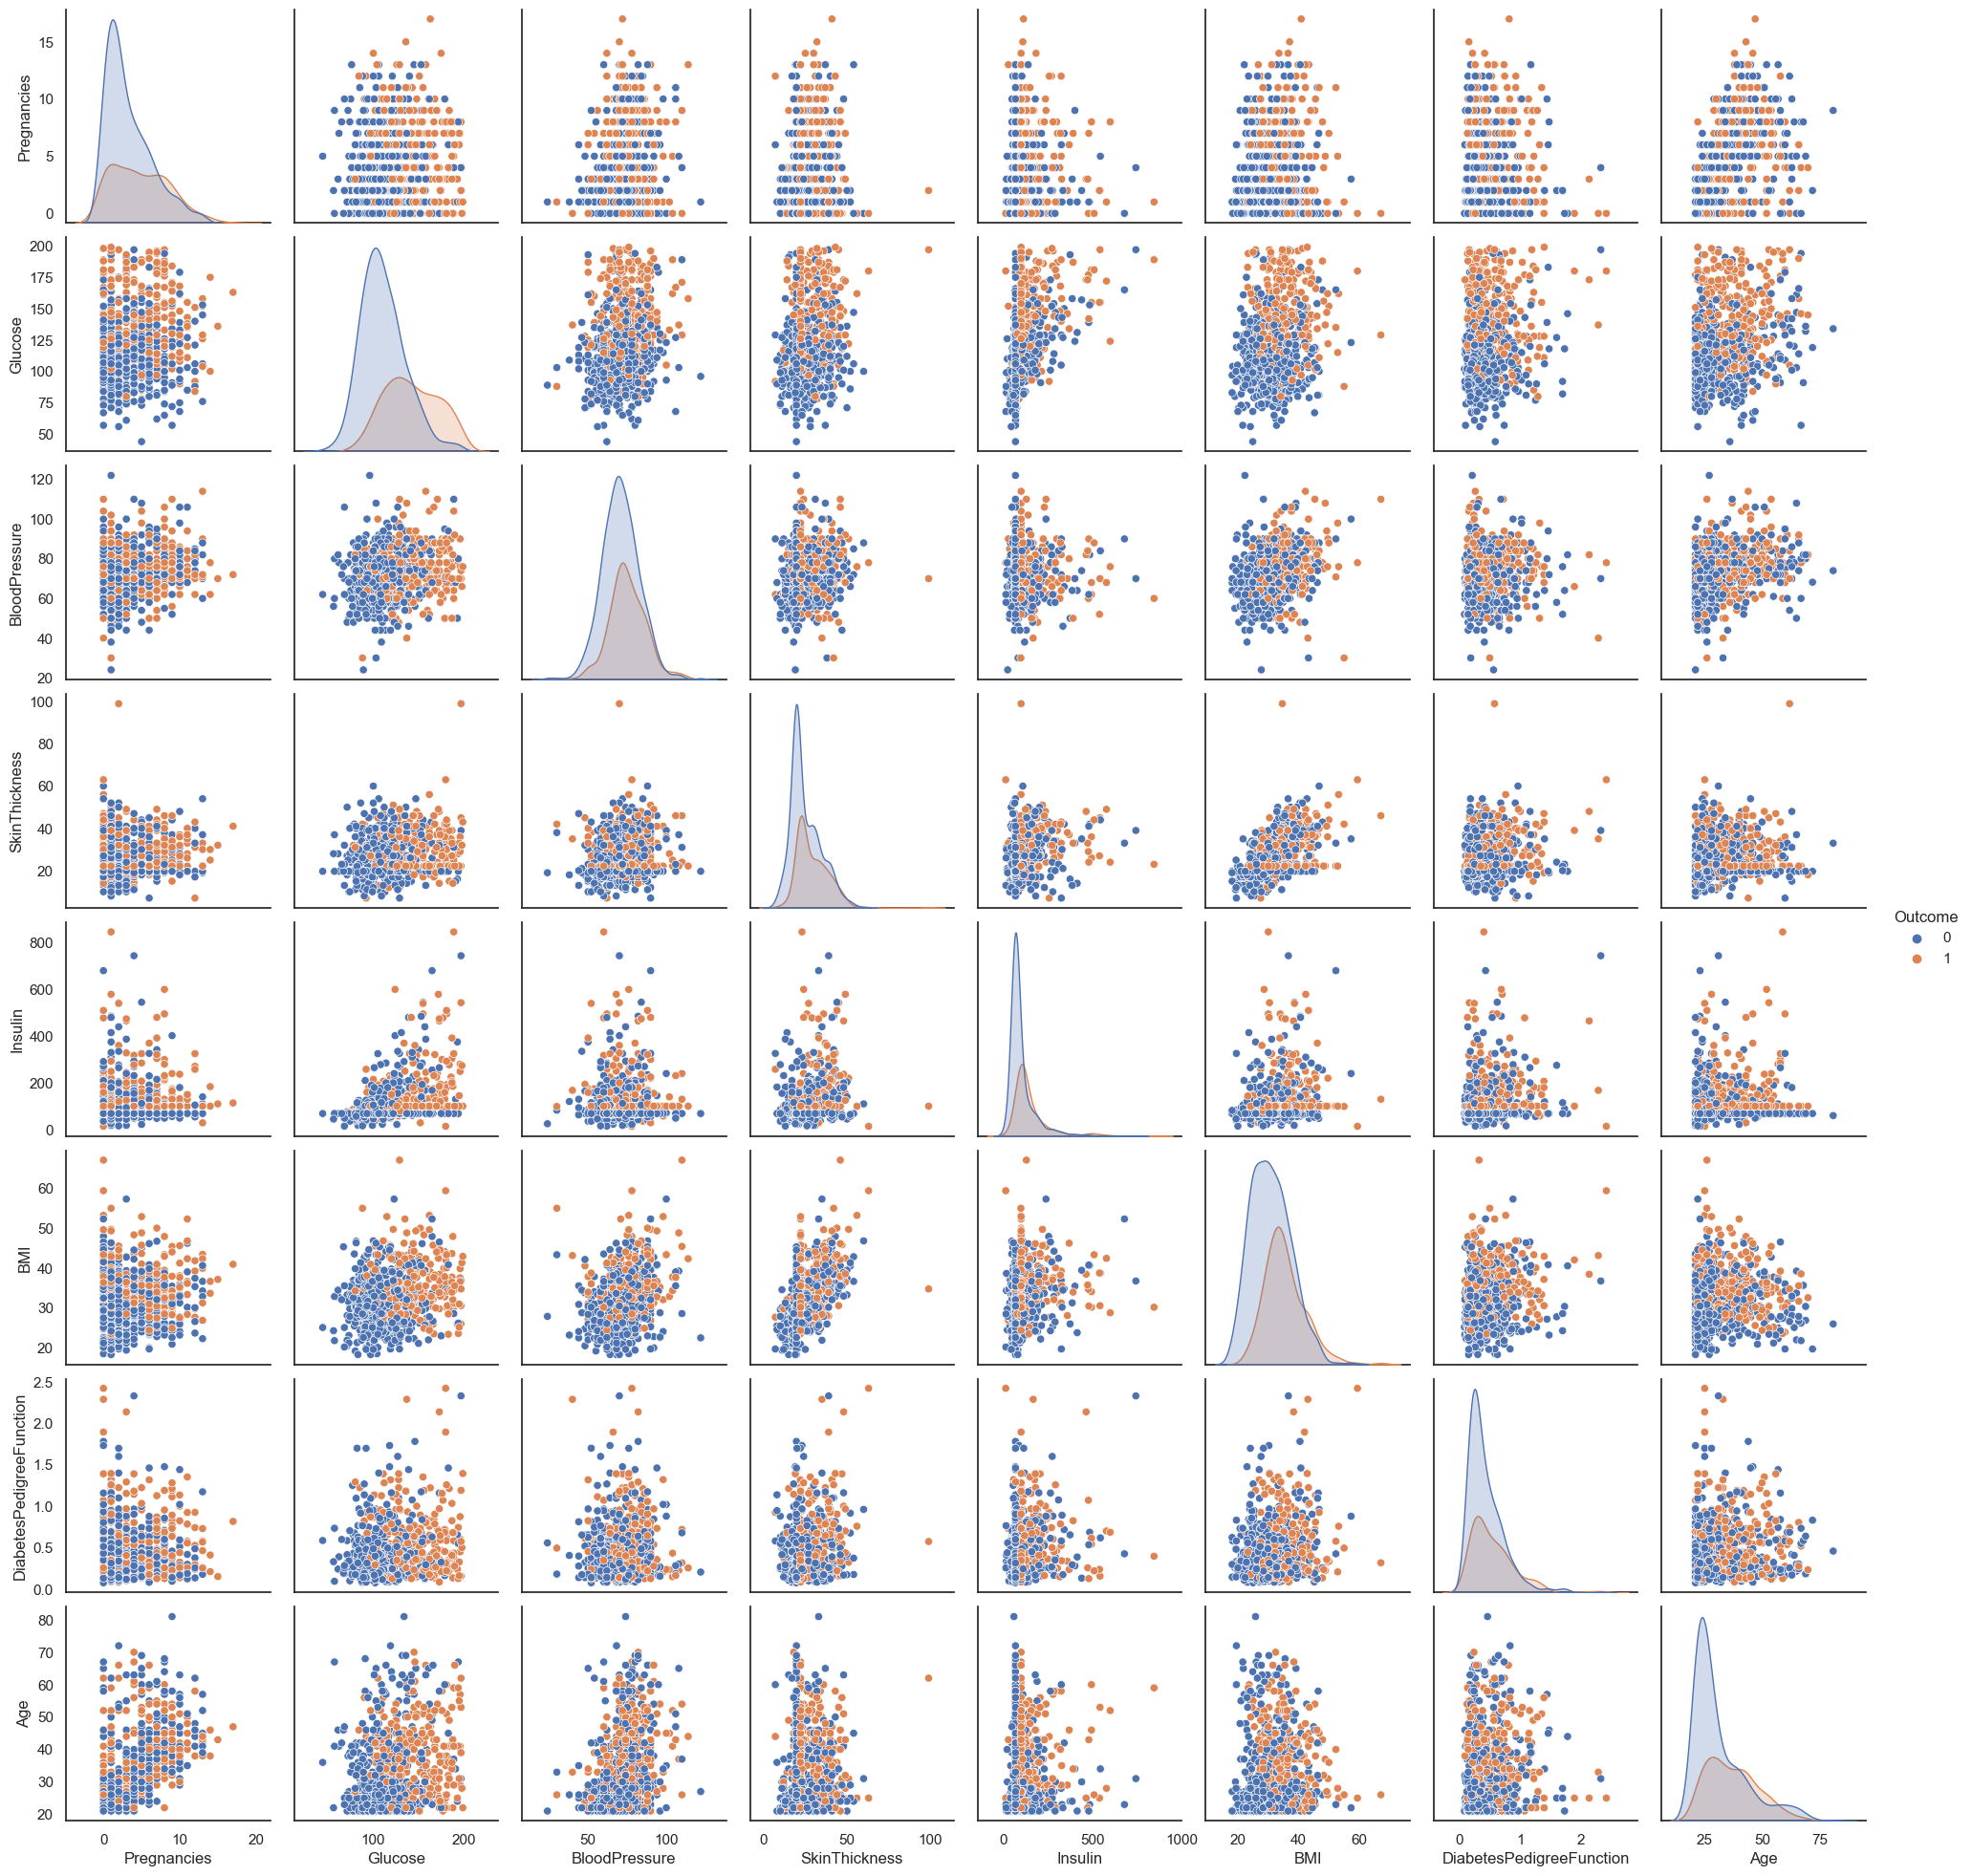

In [17]:
sns.set(style="white") 
sns.pairplot(data_clean, hue='Outcome', diag_kind='kde')
plt.show() #check the pairplot for feature selections Glucose might have highes weights?

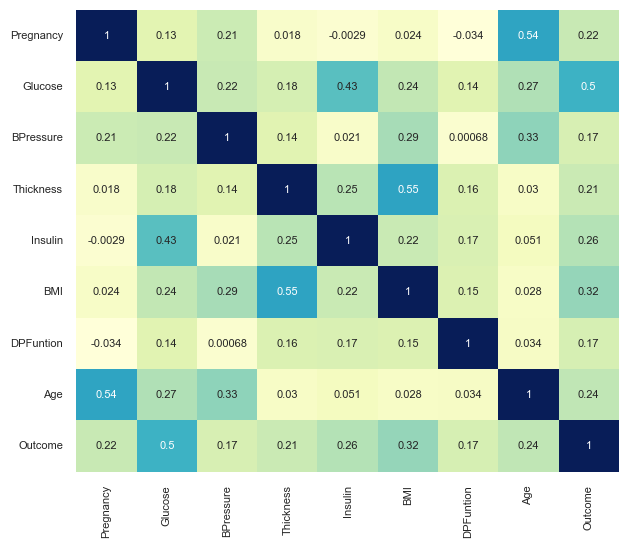

In [18]:
data_clean_renamed = data_clean.rename(columns={
    'Pregnancies': 'Pregnancy',
    'Glucose': 'Glucose',
    'BloodPressure': 'BPressure',
    'SkinThickness': 'Thickness',
    'Insulin': 'Insulin',
    'BMI': 'BMI',
    'DiabetesPedigreeFunction': 'DPFuntion',
    'Age': 'Age',
    'Outcome': 'Outcome'
})

plt.figure(figsize=(7, 6))
sns.heatmap(data_clean_renamed.corr(), annot=True, cmap='YlGnBu', annot_kws={"size": 8}, cbar=False)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

c:\Users\liaomx\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x600 with 0 Axes>

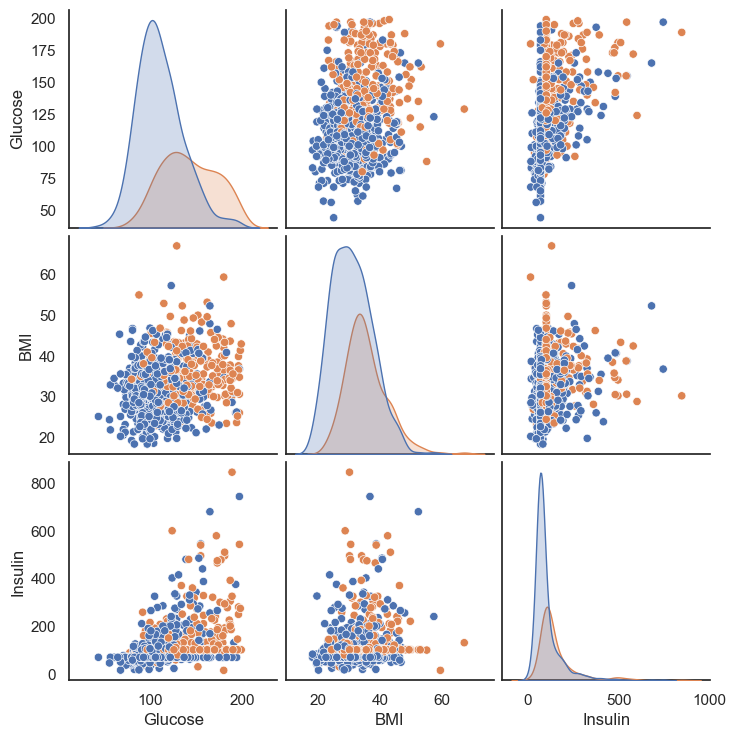

In [19]:
selected_features = ['Glucose', 'BMI', 'Insulin']  # Specify the features you want to plot
plt.figure(figsize=(7, 6))
pairplt = sns.pairplot(data_clean, hue='Outcome', vars=selected_features, diag_kind='kde')
pairplt._legend.remove()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

## 3. Pre-process

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X = data_clean.drop('Outcome', axis=1)
y = data_clean['Outcome']

In [22]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=3) #8:2 train+validate vs test
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=3) #7:3 train:validate

In [23]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)# further algothrim considering weight update, scaler will help the performance. 

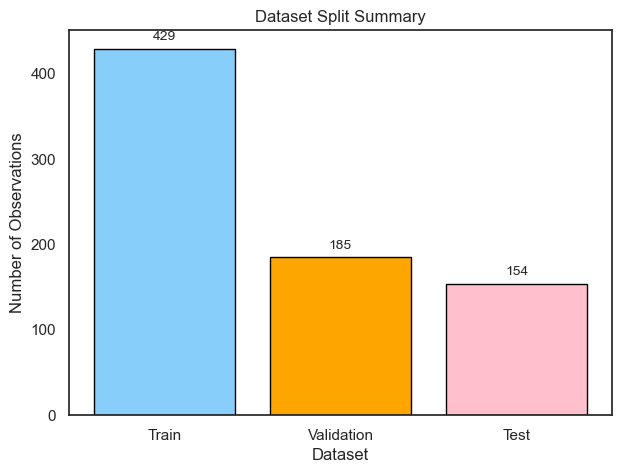

In [25]:
def visualize_split(X_train, X_val, X_test):
    train_size = len(X_train)
    val_size = len(X_val)
    test_size = len(X_test)

    labels = ['Train', 'Validation', 'Test']
    sizes = [train_size, val_size, test_size]
    colors = ['lightskyblue', 'orange', 'pink']

    plt.figure(figsize=(7, 5))
    plt.bar(labels, sizes, color=colors, edgecolor='black')
    
    plt.title('Dataset Split Summary')
    plt.xlabel('Dataset')
    plt.ylabel('Number of Observations')
    
    # Show the values on top of the bars
    for i, size in enumerate(sizes):
        plt.text(i, size + 10, str(size), ha='center', fontsize=10)

    plt.show()

# Example usage with your actual data
visualize_split(X_train, X_val, X_test)

## 4. Model Implmention 

### 4.1 Model Training

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
class SinglePerceptron:
    
    def __init__(self, learning_rate=0.1, num_epochs=200, random_state=None):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None
        
        if random_state is not None:
            np.random.seed(random_state)
    
    def stepFunction(self, t):
        return 1 if t >= 0 else 0
    
    def perceptronStep(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for epoch in range(self.num_epochs):
            for i in range(X.shape[0]):
                y_pred = self.stepFunction(np.dot(self.weights, X[i]) + self.bias)
                
                if y_pred != y[i]:
                    self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                    self.bias += self.learning_rate * (y[i] - y_pred)
                    
        print(f'Weights: {self.weights}\n')
        print(f'Bias: {self.bias}\n')
    
    def predict(self, X):
        y_pred = [self.stepFunction(np.dot(self.weights, x) + self.bias) for x in X]
        return np.array(y_pred)

In [28]:
model = SinglePerceptron(random_state=1)
model.perceptronStep(X_train, y_train)

Weights: [ 0.01611103  0.31301896  0.08184045  0.26332144  0.10760401  0.09037832
  0.19472674 -0.00377708]

Bias: -0.30000000000000004



In [29]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.7645687645687645
Test Accuracy: 0.7467532467532467


### 4.2 Model Tuning

In [30]:
class SinglePerceptron:
    
    def __init__(self, learning_rate=0.1, num_epochs=200, random_state=None, initialize_weights=True, weight_init_scale=0.01):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None
        self.initialize_weights = initialize_weights
        self.weight_init_scale = weight_init_scale
        
        if random_state is not None:
            np.random.seed(random_state)
    
    def stepFunction(self, t):
        return 1 if t >= 0 else 0
    
    def perceptronStep(self, X, y):

        if self.initialize_weights:
            self.weights = np.random.randn(X.shape[1]) * self.weight_init_scale
        else:
            self.weights = np.zeros(X.shape[1])
        
        self.bias = 0
        
        for epoch in range(self.num_epochs):
            for i in range(X.shape[0]):

                y_pred = self.stepFunction(np.dot(self.weights, X[i]) + self.bias)
                
                if y_pred != y[i]:
                    self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                    self.bias += self.learning_rate * (y[i] - y_pred)
                    
        print(f'Bias: {self.weights}\n')
        print(f'Weights: {self.bias}\n')
    
    def predict(self, X):
        y_pred = [self.stepFunction(np.dot(self.weights, x) + self.bias) for x in X]
        return np.array(y_pred)

In [31]:
def grid_search_tuning(X_train, y_train, X_val, y_val, param_grid):
    best_acc = 0
    best_params = {}

    for learning_rate in param_grid['learning_rate']:
        for num_epochs in param_grid['num_epochs']:
            for weight_init_scale in param_grid['weight_init_scale']:
                for initialize_weights in param_grid['initialize_weights']:
                    
                    print(f'Trying params: learning_rate={learning_rate}, num_epochs={num_epochs}, weight_init_scale={weight_init_scale}, initialize_weights={initialize_weights}')
                    
                    model = SinglePerceptron(
                        learning_rate=learning_rate,
                        num_epochs=num_epochs,
                        random_state=1,
                        initialize_weights=initialize_weights,
                        weight_init_scale=weight_init_scale
                    )

                    model.perceptronStep(X_train, y_train)

                    y_val_pred = model.predict(X_val)
                    val_acc = accuracy_score(y_val, y_val_pred)

                    if val_acc > best_acc:
                        best_acc = val_acc
                        best_params = {
                            'learning_rate': learning_rate,
                            'num_epochs': num_epochs,
                            'weight_init_scale': weight_init_scale,
                            'initialize_weights': initialize_weights
                        }

    print(f'Best Validation Accuracy: {best_acc}')
    print(f'Best Parameters: {best_params}')
    
    return best_params

In [32]:
param_grid_sp = {
    'learning_rate': [0.01, 0.1, 0.001],
    'num_epochs': [100, 200, 300, 500, 1000],
    'weight_init_scale': [0.01, 0.001],
    'initialize_weights': [True, False]
}

In [33]:
best_params_sp = grid_search_tuning(X_train, y_train, X_val, y_val, param_grid_sp)

Trying params: learning_rate=0.01, num_epochs=100, weight_init_scale=0.01, initialize_weights=True
Bias: [-0.01739377  0.02827649  0.02505625  0.01375456 -0.02274354  0.00829148
  0.01100877 -0.00795119]

Weights: -0.05

Trying params: learning_rate=0.01, num_epochs=100, weight_init_scale=0.01, initialize_weights=False
Bias: [-0.01084229  0.04135418  0.02700235  0.00806074 -0.01136338  0.01427597
  0.01514666  0.0144321 ]

Weights: -0.03

Trying params: learning_rate=0.01, num_epochs=100, weight_init_scale=0.001, initialize_weights=True
Bias: [ 0.00062285  0.03601325  0.01987569  0.00502561 -0.0222457   0.02402511
  0.01210477  0.00711786]

Weights: -0.019999999999999997

Trying params: learning_rate=0.01, num_epochs=100, weight_init_scale=0.001, initialize_weights=False
Bias: [-0.01084229  0.04135418  0.02700235  0.00806074 -0.01136338  0.01427597
  0.01514666  0.0144321 ]

Weights: -0.03

Trying params: learning_rate=0.01, num_epochs=200, weight_init_scale=0.01, initialize_weights=Tr

### 4.3 Model Fitting

In [34]:
# simplified the code.
class SinglePerceptron:
    
    def __init__(self, learning_rate=0.1, num_epochs=200, random_state=None):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None
        self.loss_history = []
        
        if random_state is not None:
            np.random.seed(random_state)
    
    def stepFunction(self, t):
        return 1 if t >= 0 else 0
    
    def perceptronStep(self, X, y):

        self.weights = np.random.randn(X.shape[1]) * 0.01
        self.bias = 0
        
        for epoch in range(self.num_epochs):
            errors = 0
            
            for i in range(X.shape[0]):

                y_pred = self.stepFunction(np.dot(self.weights, X[i]) + self.bias)
                error = y_train[i] - y_pred
                
                if y_pred != y[i]:
                    errors += 1
                    self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                    self.bias += self.learning_rate * (y[i] - y_pred)
                    
            self.loss_history.append(errors)
                    
        print(f'Bias: {self.weights}\n')
        print(f'Weights: {self.bias}\n')
    
    def predict(self, X):
        y_pred = [self.stepFunction(np.dot(self.weights, x) + self.bias) for x in X]
        return np.array(y_pred)
    
    def decision_function(self, X):
        return np.dot(X, self.weights) + self.bias

In [35]:
model = SinglePerceptron(
    learning_rate = best_params_sp['learning_rate'],
    num_epochs = best_params_sp['num_epochs'],
    random_state=1
)

In [36]:
model.perceptronStep(X_train, y_train)

Bias: [ 0.00801376  0.03252223 -0.00716997  0.01249173  0.00530362  0.01751277
  0.01693123  0.00466141]

Weights: -0.04



In [37]:
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Final Test Accuracy: {test_acc:.4f}')

Final Test Accuracy: 0.7273


### 4.4 Model Evaluation

In [38]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, roc_curve, roc_auc_score, precision_recall_curve, f1_score

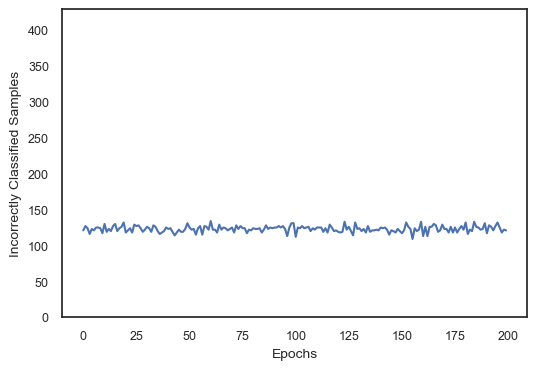

In [39]:
plt.figure(figsize=(6, 4))
plt.plot(range(len(model.loss_history)), model.loss_history)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Incorrectly Classified Samples', fontsize=10)
plt.ylim(0, len(X_train)) 
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [40]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

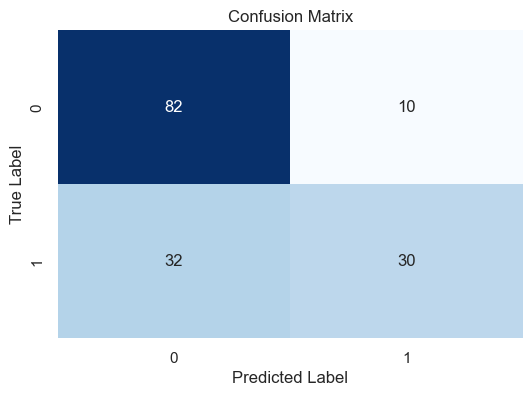

In [41]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [42]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f'Percptron Accuracy: {accuracy:.4f}')
print(f'Percptron Precision: {precision:.4f}')
print(f'Percptron Recall: {recall:.4f}')
print(f'Percptron F1 Score: {f1:.4f}')

Percptron Accuracy: 0.7273
Percptron Precision: 0.7500
Percptron Recall: 0.4839
Percptron F1 Score: 0.5882


In [43]:
print("Single Percptron Classification Report:\n", classification_report(y_test, y_test_pred))

Single Percptron Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80        92
           1       0.75      0.48      0.59        62

    accuracy                           0.73       154
   macro avg       0.73      0.69      0.69       154
weighted avg       0.73      0.73      0.71       154



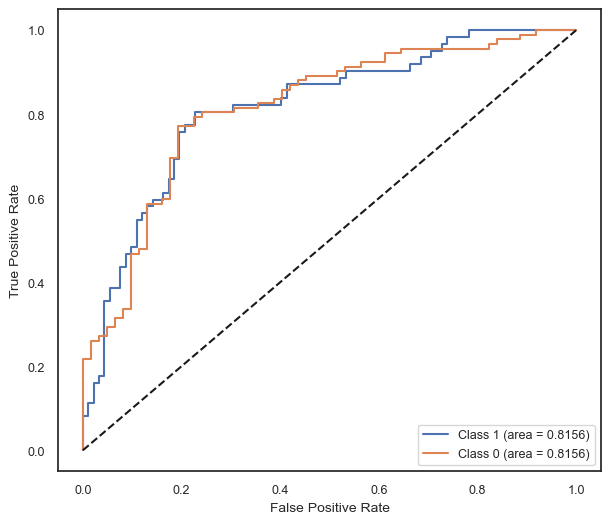

In [44]:
y_score = model.decision_function(X_test)
fpr_1, tpr_1, _ = roc_curve(y_test, y_score, pos_label=1)
roc_auc_1 = roc_auc_score(y_test, y_score)
fpr_0, tpr_0, _ = roc_curve(y_test, -y_score, pos_label=0)
roc_auc_0 = roc_auc_score(1 - y_test, -y_score)

plt.figure(figsize=(7, 6))
plt.plot(fpr_1, tpr_1, label=f'Class 1 (area = {roc_auc_1:.4f})')
plt.plot(fpr_0, tpr_0, label=f'Class 0 (area = {roc_auc_0:.4f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(loc='lower right', fontsize=9)
plt.show()

## 5. Model Comparsion

In [45]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

### 5.1 With sklearn single perceptron hyperparameters tuned

In [46]:
param_grid_sklearn_sp = {
    'max_iter': [100, 200, 500],
    'eta0': [0.001, 0.01, 0.1],
    'penalty': [None, 'l2'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

In [47]:
sklearn_perceptron = Perceptron(random_state=1)

In [48]:
grid_search = GridSearchCV(estimator=sklearn_perceptron, param_grid=param_grid_sklearn_sp, scoring='accuracy', cv=5)

In [49]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Perceptron(random_state=1),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'eta0': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 500], 'penalty': [None, 'l2']},
             scoring='accuracy')

In [50]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

Best parameters: {'alpha': 0.001, 'eta0': 0.01, 'max_iter': 100, 'penalty': 'l2'}
Best cross-validation accuracy: 0.7225170998632011


In [51]:
model_slp = Perceptron(alpha=0.001, eta0=0.01, max_iter=100, penalty='l2', random_state=1)
model_slp.fit(X_train, y_train)
y_pred_slp = model_slp.predict(X_test)

In [52]:
accuracy_slp = accuracy_score(y_test, y_pred_slp)
precision_slp = precision_score(y_test, y_pred_slp)
recall_slp = recall_score(y_test, y_pred_slp)
f1_slp = f1_score(y_test, y_pred_slp)

print(f'Tuned Sklearn Percptron Accuracy: {accuracy_slp:.4f}')
print(f'Tuned Sklearn Percptron Precision: {precision_slp:.4f}')
print(f'Tuned Sklearn Percptron Recall: {recall_slp:.4f}')
print(f'Tuned Sklearn Percptron F1 Score: {f1_slp:.4f}')

Tuned Sklearn Percptron Accuracy: 0.6429
Tuned Sklearn Percptron Precision: 0.5507
Tuned Sklearn Percptron Recall: 0.6129
Tuned Sklearn Percptron F1 Score: 0.5802


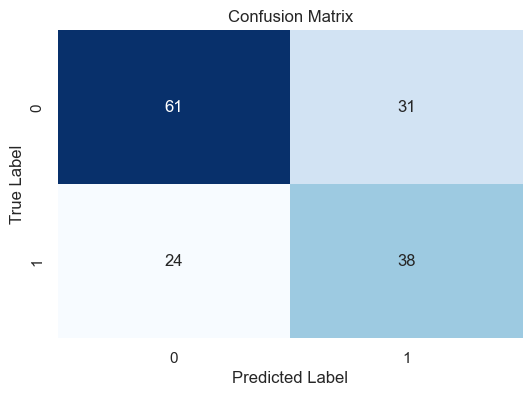

In [53]:
conf_matrix_slp = confusion_matrix(y_test, y_pred_slp)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_slp, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

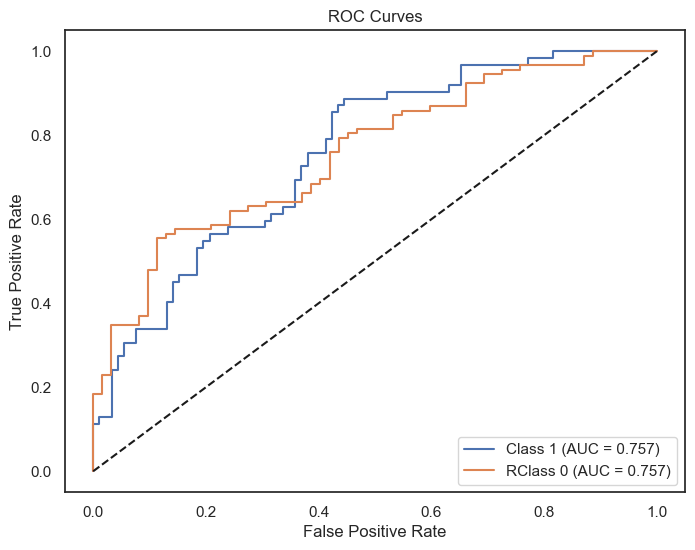

In [54]:
y_score_slp = model_slp.decision_function(X_test)

fpr_1, tpr_1, _ = roc_curve(y_test, y_score_slp, pos_label=1)
roc_auc_1 = roc_auc_score(y_test, y_score_slp)
fpr_0, tpr_0, _ = roc_curve(y_test, -y_score_slp, pos_label=0)
roc_auc_0 = roc_auc_score(1 - y_test, -y_score_slp)

plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, label=f'Class 1 (AUC = {roc_auc_1:.3f})')
plt.plot(fpr_0, tpr_0, label=f'RClass 0 (AUC = {roc_auc_0:.3f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

### 5.2 With sklearn multi layer perceptron hyperparameters tuned

In [55]:
mlp = MLPClassifier(random_state=1)

In [56]:
param_grid_mlp = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (50,), (20, 10)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01],  #l2
    'solver': ['adam', 'sgd'],  #optimazation weights
    'max_iter': [400]
}

In [57]:
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)
print(f"Best Parameters: {grid_search_mlp.best_params_}")
print(f"Best Accuracy: {grid_search_mlp.best_score_}")

Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1, 'max_iter': 400, 'solver': 'sgd'}
Best Accuracy: 0.839206566347469


In [58]:
model_mlp = MLPClassifier(activation='relu', alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=400, solver='sgd', random_state=1)
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)

In [59]:
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print(f'Tuned MLP Accuracy: {accuracy_mlp:.4f}')
print(f'Tuned MLP Precision: {precision_mlp:.4f}')
print(f'Tuned MLP Recall: {recall_mlp:.4f}')
print(f'Tuned MLP F1 Score: {f1_mlp:.4f}')

Tuned MLP Accuracy: 0.8182
Tuned MLP Precision: 0.8036
Tuned MLP Recall: 0.7258
Tuned MLP F1 Score: 0.7627


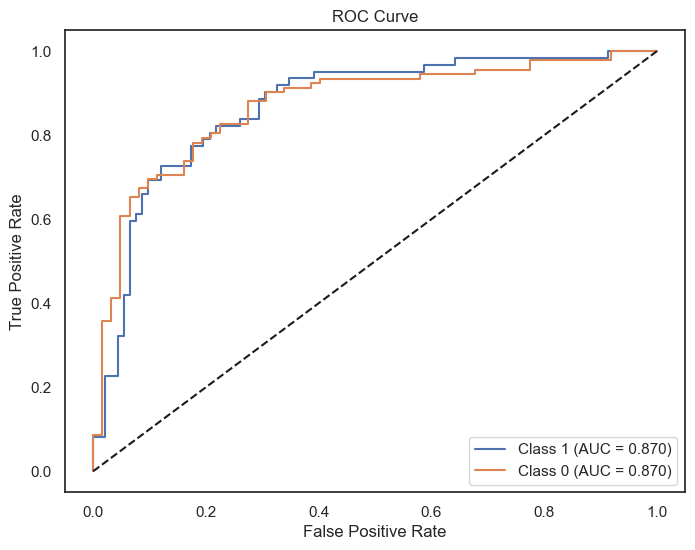

In [60]:
y_score_mlp_class_1 = model_mlp.predict_proba(X_test)[:, 1]
y_score_mlp_class_0 = model_mlp.predict_proba(X_test)[:, 0]

fpr_mlp_1, tpr_mlp_1, _ = roc_curve(y_test, y_score_mlp_class_1, pos_label=1)
roc_auc_mlp_1 = roc_auc_score(y_test, y_score_mlp_class_1)

fpr_mlp_0, tpr_mlp_0, _ = roc_curve(y_test, y_score_mlp_class_0, pos_label=0)
roc_auc_mlp_0 = roc_auc_score(1 - y_test, y_score_mlp_class_0)

plt.figure(figsize=(8, 6))


plt.plot(fpr_mlp_1, tpr_mlp_1, label=f'Class 1 (AUC = {roc_auc_mlp_1:.3f})')
plt.plot(fpr_mlp_0, tpr_mlp_0, label=f'Class 0 (AUC = {roc_auc_mlp_0:.3f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

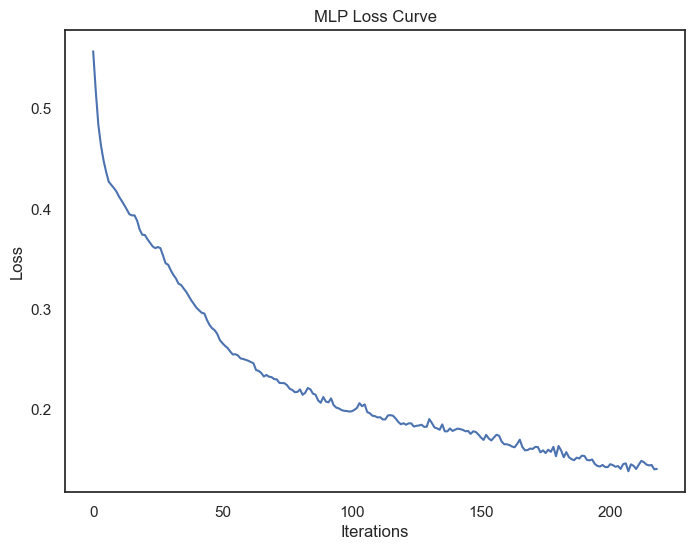

In [61]:
plt.figure(figsize=(8, 6))
plt.plot(model_mlp.loss_curve_)
plt.title('MLP Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

### 5.3 Feature Importance

In [62]:
def plot_feature_importance(weights, feature_names, model_name):
    sorted_idx = np.argsort(np.abs(weights))[::-1]
    sorted_weights = np.abs(weights)[sorted_idx]
    sorted_feature_names = np.array(feature_names)[sorted_idx]
    
    plt.figure(figsize=(8, 6))
    plt.barh(sorted_feature_names, sorted_weights, color='skyblue')
    plt.xlabel("Absolute Feature Weights")
    plt.title(f"{model_name} Feature Importance")
    plt.show()

In [63]:
model.weights

array([ 0.00801376,  0.03252223, -0.00716997,  0.01249173,  0.00530362,
        0.01751277,  0.01693123,  0.00466141])

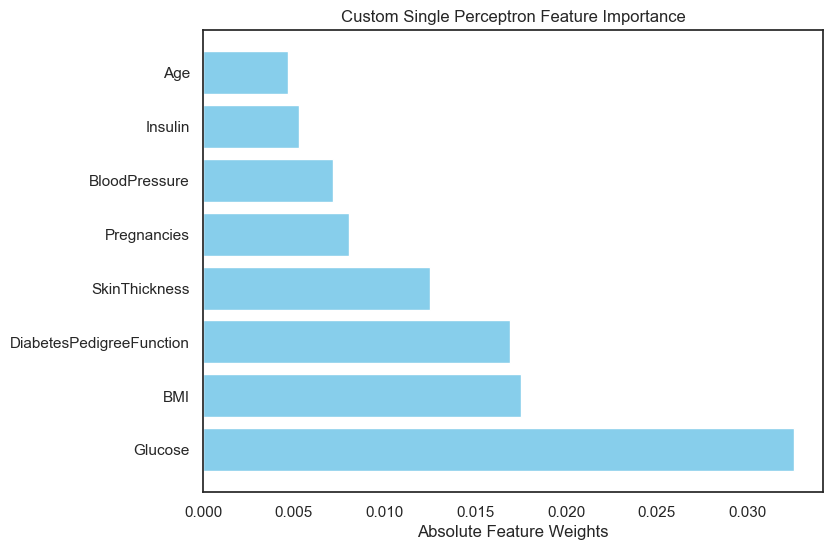

In [64]:
feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
plot_feature_importance(model.weights, feature_names, model_name="Custom Single Perceptron")


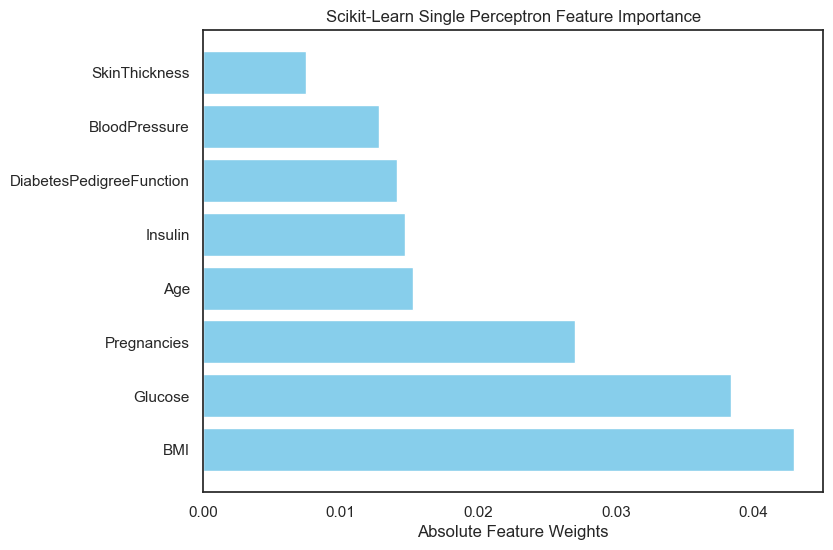

In [65]:
plot_feature_importance(model_slp.coef_.flatten(), feature_names, model_name="Scikit-Learn Single Perceptron")

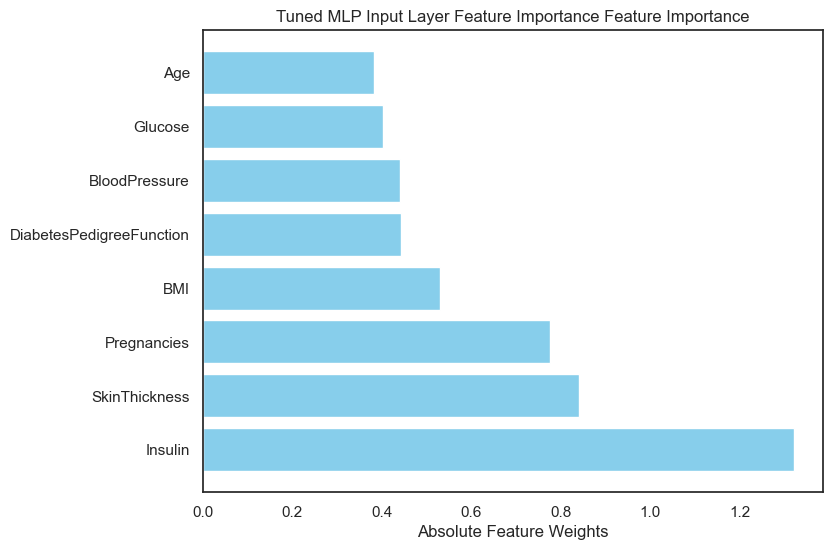

In [66]:
input_layer_weights = model_mlp.coefs_[0]
average_weights = np.mean(np.abs(input_layer_weights), axis=1)
plot_feature_importance(average_weights, feature_names, model_name="Tuned MLP Input Layer Feature Importance")

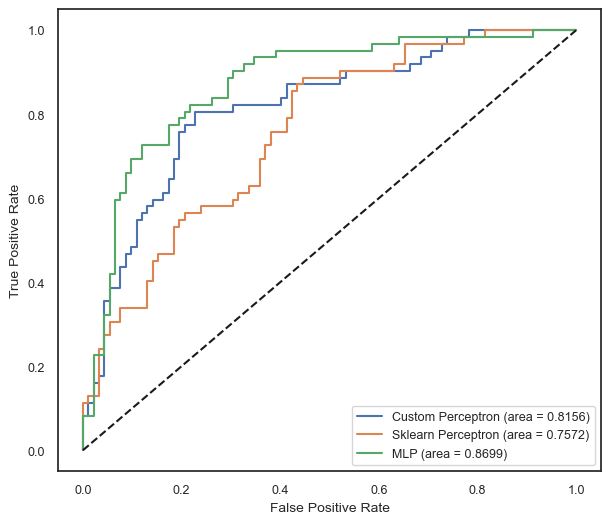

In [67]:
y_scores_custom = model.decision_function(X_test)
y_scores_sklearn = model_slp.decision_function(X_test)
y_scores_mlp = model_mlp.predict_proba(X_test)

fpr_custom, tpr_custom, _ = roc_curve(y_test, y_scores_custom)
auc_custom = roc_auc_score(y_test, y_scores_custom)

fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, y_scores_sklearn)
auc_sklearn = roc_auc_score(y_test, y_scores_sklearn)

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_scores_mlp[:, 1])
auc_mlp = roc_auc_score(y_test, y_scores_mlp[:, 1])

plt.figure(figsize=(7, 6))

plt.plot(fpr_custom, tpr_custom, label=f'Custom Perceptron (area = {auc_custom:.4f})')
plt.plot(fpr_sklearn, tpr_sklearn, label=f'Sklearn Perceptron (area = {auc_sklearn:.4f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (area = {auc_mlp:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.legend(loc='best', fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()